<a href="https://colab.research.google.com/github/nathalyAlarconT/WiDS_Datathon_2019/blob/master/WiDS_Datathon2019_BasicDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required libraries
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random

In [0]:
root_path = '/content'

# Descarga de Datos

*Download the data*

Ve a tu cuenta en kaggle, descarga tu API-Key. Abre el archivo con un editor de texto y copia el username y key. Reemplaza esos valores en la siguiente celda.

*Go to your kaggle account and download your api key. Open the file with a text editor and copy the username and the key to replace them on the following cells.*
## Configura tu Kaggle Api key

A nice tutorial: https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235

**¡Atención! 
Es importante que copies tu username y key en las siguiente celda para la correcta ejecución del resto del notebook. **

In [0]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'
######################################################################################
# Copy here your api key
# api_token = {"username":"username","key":"TOKEN_HERE"}
api_token = {"username":"*******","key":"********************************"}
######################################################################################


with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

## Descarga el dataset

Download the dataset

In [0]:
!kaggle competitions download -c widsdatathon2019

  0% 0.00/354k [00:00<?, ?B/s]
100% 354k/354k [00:00<00:00, 54.3MB/s]
 61% 27.0M/44.1M [00:00<00:00, 115MB/s]
100% 44.1M/44.1M [00:00<00:00, 147MB/s]
 92% 83.0M/90.4M [00:00<00:00, 88.3MB/s]
100% 90.4M/90.4M [00:00<00:00, 114MB/s] 
 93% 296M/317M [00:01<00:00, 171MB/s]
100% 317M/317M [00:01<00:00, 172MB/s]
  0% 0.00/134k [00:00<?, ?B/s]
100% 134k/134k [00:00<00:00, 110MB/s]


## Descomprime los archivos

Unzip the files

In [0]:
for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

## Carga training labels

Load training labels

In [0]:
df_training = pd.read_csv(root_path+'/traininglabels.csv')
tr_nsamples = len(df_training)
print("Nro de registros en el dataset de training: ", tr_nsamples)
df_training.head()

Nro de registros en el dataset de training:  15244


,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


## Carga el sample submission

Load sample submission file

In [0]:
df_sample_sub = pd.read_csv(root_path+'/SampleSubmission.csv')
print("Sample rows", len(df_sample_sub))
df_sample_sub.head(10)

Sample rows 6534


,image_id,has_oilpalm
0,img_000012018.jpg,1
1,img_000022018.jpg,1
2,img_000032017.jpg,1
3,img_000042017.jpg,1
4,img_000052017.jpg,1
5,img_000062017.jpg,1
6,img_000062018.jpg,1
7,img_000122017.jpg,1
8,img_000132018.jpg,1
9,img_000142018.jpg,1


## Test Data

Tenemos imágenes en la carpeta de test del dataset leaderboard_test_data

In [0]:
path_test_data = root_path+'/leaderboard_test_data/'
test_files = os.listdir(path_test_data)
print ("Test samples qty: ", len(test_files))

test_files[0:10]


Test samples qty:  4356


['img_038432018.jpg',
 'img_107282018.jpg',
 'img_074172018.jpg',
 'img_027482017.jpg',
 'img_067812017.jpg',
 'img_017352017.jpg',
 'img_082792017.jpg',
 'img_010732017.jpg',
 'img_043072018.jpg',
 'img_011052017.jpg']

# Análisis básico de datos

Basic Data Analysis

In [0]:
df_training.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


Unique values
[0 1]
************************************************************
Samples per class
0    14302
1      942
Name: has_oilpalm, dtype: int64
************************************************************


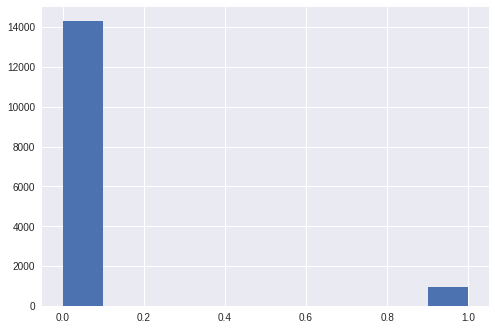

In [0]:
print("Unique values")
print (df_training['has_oilpalm'].unique())
print("*" * 60)
print("Samples per class")
print (df_training['has_oilpalm'].value_counts())
print("*" * 60)
df_training['has_oilpalm'].hist()

*Tenemos un dataset imbalanceado *


We have an imbalanced dataset

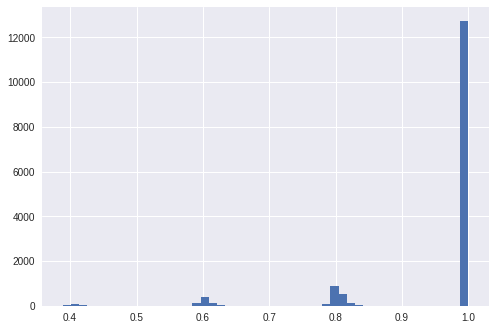

In [0]:
# print("Unique values")
# print (df_training['score'].unique())
# print("*" * 60)
# colors = {1: 'r',  0: 'g'}
# df_training['score'].plot(kind='hist', bins=100, color=[colors[i] for i in df_training['has_oilpalm'] ]) # [colors[i] for i in df['group']])
df_training['score'].hist(bins=50)
# df_training[df_training['has_oilpalm']== 0]['score'].hist(bins=50)

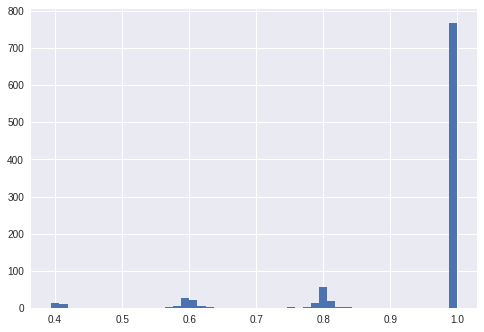

In [0]:
df_training[df_training['has_oilpalm']== 1]['score'].hist(bins=50)

### Visualización de ejemplos de dataset

Visualizaremos un ejemplo al azar del dataset

*Data set Visualization*
Random dataset example visualization



Sample id: 3612
image_id       img_052222017.jpg
has_oilpalm                    1
score                          1
Name: 3612, dtype: object


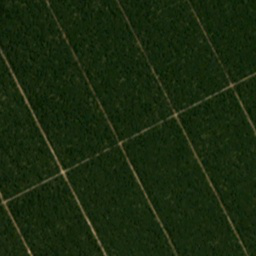

In [0]:
# Visualize random samples
n_sample = random.randint(0,(tr_nsamples - 1))  

print("Sample id:", n_sample)

print(df_training.iloc[n_sample])
Image.open(root_path+'/train_images/'+df_training.iloc[n_sample]['image_id'])

In [0]:
# df_training[df_training['has_oilpalm'] == 1]

# Data Preparation

### Dataset folder preparation
Vamos a crear una carpeta por cada clase y vamos a mover las imágenes a su respectivo folder

*We will create a folder per each class and we will copy the images to it's folder class*

In [0]:
tr_path = root_path+'/training_ready'
tr_path_train_im = root_path+'/train_images'

os.makedirs(tr_path, exist_ok=True)

for index, row in df_training.iterrows():
  tr_class = row['has_oilpalm']
  tr_image = row['image_id']
  # Create the class folder if it doesn't exists yet.
  os.makedirs(tr_path+'/'+str(tr_class), exist_ok=True)
  # Copy files
  os.system('cp '+tr_path_train_im+'/'+tr_image+' '+tr_path+'/'+str(tr_class)+'/'+tr_image)  
  
